# 2025 March Madness Tournament Winner Prediction

March Madness is a yearly single-game elimination basketball tournament to determine the national champion of NCAA Division 1 men's basketball. Known for its shocking upsets of highly seeded teams, it has become one of the biggest annual sporting events in the United States. The tournament has qualified 64 teams since 1985 until 2011 when it adopted a 68 team format with the addition the "First Four" or play-in round. The tournament was canceled for the first time in 2020 due to the COVID-19 Pandemic (datasets may have missing data for 2020).

32 teams automatically qualify for the tournament by winning their conference tournament, played two weeks before March Madness. 36 teams qualify for an at-large bid based on their performance during the season. The Selection Committee determines the at-large bids and ranks the teams from 1 to 68. The tournament is divided into four regions with each region having sixteen to eighteen teams (due to the First Four round in two regions). Each region's teams are seeded from 1 to 16. 

Source: https://en.wikipedia.org/wiki/NCAA_Division_I_men's_basketball_tournament

## Import Libraries

In [1]:
# Import libraries
import pandas as pd
from pandas.plotting import scatter_matrix 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import NearestNeighbors

## Data Cleaning

In [2]:
# Read in Dataset of Division 1 College Basketball Teams from 2013-2023 Seasons
# Dataset link: https://www.kaggle.com/datasets/andrewsundberg/college-basketball-dataset?resource=download&select=cbb.csv
historical_seasons = pd.read_csv('cbb.csv')
historical_seasons.head()

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1.0,2016
1,Wisconsin,B10,40,36,129.1,93.6,0.9758,54.8,47.7,12.4,...,22.4,54.8,44.7,36.5,37.5,59.3,11.3,2ND,1.0,2015
2,Michigan,B10,40,33,114.4,90.4,0.9375,53.9,47.7,14.0,...,30.0,54.7,46.8,35.2,33.2,65.9,6.9,2ND,3.0,2018
3,Texas Tech,B12,38,31,115.2,85.2,0.9696,53.5,43.0,17.7,...,36.6,52.8,41.9,36.5,29.7,67.5,7.0,2ND,3.0,2019
4,Gonzaga,WCC,39,37,117.8,86.3,0.9728,56.6,41.1,16.2,...,26.9,56.3,40.0,38.2,29.0,71.5,7.7,2ND,1.0,2017


In [3]:
# Check for missing values
historical_seasons.isnull().sum()

TEAM             0
CONF             0
G                0
W                0
ADJOE            0
ADJDE            0
BARTHAG          0
EFG_O            0
EFG_D            0
TOR              0
TORD             0
ORB              0
DRB              0
FTR              0
FTRD             0
2P_O             0
2P_D             0
3P_O             0
3P_D             0
ADJ_T            0
WAB              0
POSTSEASON    2843
SEED          2843
YEAR             0
dtype: int64

Postseason and Seed have many missing values because those rows represents seasons in which teams did not qualify for the March Madness Tournament. Note: Only 68 teams qualify every year.

In [4]:
# Check for duplicate rows
historical_seasons.duplicated().sum()

0

In [5]:
# Read in Basic Stats DataSet of 2024-25 Division 1 College Basketball Teams, as of date: Feb. 26, 2025
# From Sports Reference: https://www.sports-reference.com/cbb/seasons/men/2025-school-stats.html
current_season_basic = pd.read_csv('2024-25 College Basketball Basic Stats.csv')
current_season_basic.head()

,Rk,School,Games,W,L,W-L%,SRS,SOS,Conf. W,Conf. L,...,FT,FTA,FT%,ORB,TRB,AST,STL,BLK,TOV,PF
0,1,Auburn,27,25,2,0.926,30.31,14.13,13,1,...,406,548,0.741,333,1044,449,193,176,246,490
1,2,Drake,28,25,3,0.893,9.20,0.47,15,3,...,422,600,0.703,285,863,374,250,62,324,450
2,3,Duke,28,25,3,0.893,30.56,8.99,16,1,...,405,520,0.779,306,1073,482,195,98,267,445
3,4,High Point,30,25,5,0.833,5.42,-5.29,13,2,...,514,666,0.772,329,1082,391,183,86,309,553
4,5,Saint Mary's (CA),29,25,4,0.862,18.50,5.54,15,1,...,369,532,0.694,403,1143,464,192,117,282,434


In [6]:
# Drop uncessary column Rank
current_season_basic = current_season_basic.drop(columns=['Rk'])

In [7]:
# Check for missing values
current_season_basic.isnull().sum()

School          0
Games           0
W               0
L               0
W-L%            0
SRS             0
SOS             0
Conf. W         0
Conf. L         0
Home W          0
Home L          0
Away W          0
Away L          0
Team Pts        0
Opponent Pts    0
MP              0
FG              0
FGA             0
FG%             0
3P              0
3PA             0
3P%             0
FT              0
FTA             0
FT%             0
ORB             0
TRB             0
AST             0
STL             0
BLK             0
TOV             0
PF              0
dtype: int64

In [8]:
# Check for duplicate rows
current_season_basic.duplicated().sum()

0

In [9]:
# Read in Advanced Stats DataSet of 2024-25 Division 1 College Basketball Teams, as of date: Feb. 26, 2025
# From Sports Reference: https://www.sports-reference.com/cbb/seasons/men/2025-advanced-school-stats.html
current_season_adv = pd.read_csv('2024-25 College Basketball Advanced Stats.csv')
current_season_adv.head()

,Rk,School,Games,W,L,W-L%,SRS,SOS,Conf. W,Conf. L,...,3PAr,TS%,TRB%,AST%,STL%,BLK%,eFG%,TOV%,ORB%,FT/FGA
0,1,Auburn,27,25,2,0.926,30.31,14.13,13,1,...,0.407,0.584,53.8,55.4,10.3,17.1,0.554,11.2,35.7,0.240
1,2,Drake,28,25,3,0.893,9.20,0.47,15,3,...,0.368,0.589,55.7,54.3,14.5,7.7,0.558,16.1,36.5,0.300
2,3,Duke,28,25,3,0.893,30.56,8.99,16,1,...,0.453,0.612,55.9,59.7,10.5,9.9,0.580,12.4,34.7,0.247
3,4,High Point,30,25,5,0.833,5.42,-5.29,13,2,...,0.392,0.603,54.1,45.9,9.1,7.9,0.565,13.1,35.0,0.297
4,5,Saint Mary's (CA),29,25,4,0.862,18.50,5.54,15,1,...,0.341,0.544,57.0,57.9,10.2,10.7,0.517,12.4,39.7,0.212


In [10]:
# Drop unecessary columns, since dataframes will be merged later on
current_season_adv = current_season_adv.drop(columns=['Rk', 'Games', 'W', 'L', 'W-L%', 'SRS', 'SOS', 'Conf. W', 'Conf. L', 'Home W',
                                                      'Home L', 'Away W', 'Away L', 'Team Pts', 'Opponent Pts'])

In [11]:
# Merge dataframes by School
merged_current_season_df = pd.merge(current_season_basic, current_season_adv, on='School')
merged_current_season_df.head()

,School,Games,W,L,W-L%,SRS,SOS,Conf. W,Conf. L,Home W,...,3PAr,TS%,TRB%,AST%,STL%,BLK%,eFG%,TOV%,ORB%,FT/FGA
0,Auburn,27,25,2,0.926,30.31,14.13,13,1,12,...,0.407,0.584,53.8,55.4,10.3,17.1,0.554,11.2,35.7,0.240
1,Drake,28,25,3,0.893,9.20,0.47,15,3,13,...,0.368,0.589,55.7,54.3,14.5,7.7,0.558,16.1,36.5,0.300
2,Duke,28,25,3,0.893,30.56,8.99,16,1,15,...,0.453,0.612,55.9,59.7,10.5,9.9,0.580,12.4,34.7,0.247
3,High Point,30,25,5,0.833,5.42,-5.29,13,2,15,...,0.392,0.603,54.1,45.9,9.1,7.9,0.565,13.1,35.0,0.297
4,Saint Mary's (CA),29,25,4,0.862,18.50,5.54,15,1,15,...,0.341,0.544,57.0,57.9,10.2,10.7,0.517,12.4,39.7,0.212


In [12]:
# Check dataframes were merged correctly
merged_current_season_df.shape

(364, 45)

## Exploratory Data Analysis

Let's perform some EDA on the historical seasons data.

In [13]:
historical_seasons.describe()

,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,...,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,SEED,YEAR
count,3523.000000,3523.000000,3523.000000,3523.000000,3523.000000,3523.000000,3523.000000,3523.000000,3523.000000,3523.000000,...,3523.000000,3523.000000,3523.000000,3523.000000,3523.000000,3523.000000,3523.000000,3523.000000,680.000000,3523.000000
mean,30.486233,15.990633,103.151320,103.153250,0.494067,49.887823,50.087113,18.696509,18.625092,29.308544,...,34.529066,34.802555,49.112433,49.289299,34.185580,34.369316,67.735339,-7.579620,8.801471,2017.828555
std,3.951584,6.572893,7.264859,6.511989,0.255338,3.078505,2.894967,2.104119,2.241067,4.214131,...,5.514264,6.396757,3.400389,3.317012,2.729186,2.435546,3.091703,6.815976,4.673461,3.257824
min,5.000000,0.000000,76.600000,84.000000,0.005000,39.200000,39.600000,11.900000,10.200000,14.400000,...,19.600000,16.500000,37.700000,37.700000,24.900000,26.100000,57.200000,-25.200000,1.000000,2013.000000
25%,29.000000,11.000000,98.200000,98.400000,0.281300,47.900000,48.100000,17.300000,17.100000,26.500000,...,30.600000,30.200000,46.800000,47.100000,32.300000,32.700000,65.700000,-12.600000,5.000000,2015.000000
50%,31.000000,16.000000,102.800000,103.200000,0.475600,49.800000,50.100000,18.600000,18.500000,29.400000,...,34.300000,34.100000,49.000000,49.300000,34.100000,34.300000,67.700000,-7.900000,9.000000,2018.000000
75%,33.000000,21.000000,107.900000,107.800000,0.714250,51.900000,52.000000,20.000000,20.100000,32.100000,...,38.100000,38.800000,51.300000,51.500000,36.000000,36.000000,69.700000,-3.000000,13.000000,2021.000000
max,40.000000,38.000000,129.100000,124.000000,0.984200,61.000000,60.100000,27.100000,28.500000,43.600000,...,58.600000,60.700000,64.000000,61.200000,44.100000,43.100000,83.400000,13.100000,16.000000,2023.000000


In [14]:
# Create Win Percentage column
historical_seasons['W-L%'] = historical_seasons['W'] / historical_seasons['G']

In [15]:
# Championship teams from 2013 to 2023
champions = historical_seasons[historical_seasons['POSTSEASON'] == 'Champions']
champions

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR,W-L%
7,Duke,ACC,39,35,125.2,90.6,0.9764,56.6,46.5,16.3,...,55.9,46.3,38.7,31.4,66.4,10.7,Champions,1.0,2015,0.897436
8,Virginia,ACC,38,35,123.0,89.9,0.9736,55.2,44.7,14.7,...,52.5,45.7,39.5,28.9,60.7,11.1,Champions,1.0,2019,0.921053
9,North Carolina,ACC,39,33,121.0,91.5,0.9615,51.7,48.1,16.2,...,51.0,46.3,35.5,33.9,72.8,8.4,Champions,1.0,2017,0.846154
10,Villanova,BE,40,35,123.1,90.9,0.9703,56.1,46.7,16.3,...,57.4,44.1,36.2,33.9,66.7,8.9,Champions,2.0,2016,0.875000
11,Villanova,BE,40,36,128.4,94.1,0.9725,59.5,48.5,15.0,...,59.0,49.0,40.1,31.7,69.6,10.6,Champions,1.0,2018,0.900000
12,Connecticut,Amer,40,32,112.5,91.3,0.9171,51.5,44.6,17.3,...,48.1,42.2,38.7,33.0,64.8,4.7,Champions,7.0,2014,0.800000
13,Louisville,BE,40,35,115.9,84.5,0.9743,50.6,44.8,18.3,...,50.8,43.4,33.3,31.8,67.1,9.0,Champions,1.0,2013,0.875000
2456,Baylor,B12,24,22,123.2,94.5,0.9548,57.5,49.1,17.6,...,54.1,48.1,41.8,34.0,68.8,6.6,Champions,1.0,2021,0.916667
2803,Kansas,B12,40,34,119.8,91.3,0.9580,53.8,45.8,17.3,...,53.6,46.4,36.1,29.8,69.1,10.4,Champions,1.0,2022,0.850000
3172,Connecticut,BE,39,31,121.5,91.2,0.9643,53.9,44.4,18.9,...,53.6,44.4,36.3,29.7,66.7,5.0,Champions,4.0,2023,0.794872


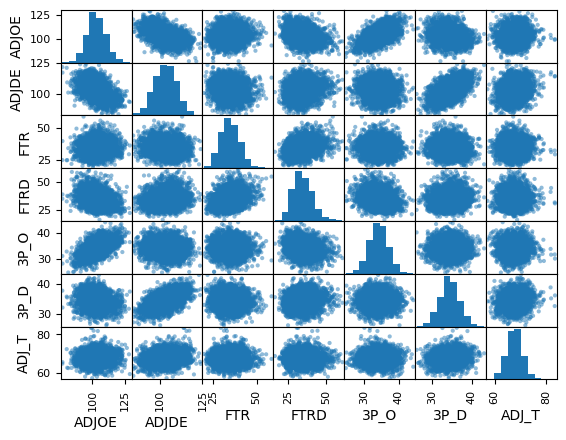

In [16]:
# Explore correlation between some features
features = ['ADJOE', 'ADJDE', 'FTR', 'FTRD', '3P_O', '3P_D', 'ADJ_T']
fig1 = scatter_matrix(historical_seasons[features])

In [17]:
# Remove teams with W-L% >= 1.0, no team has been undefeated for an entire season since 1975-76, data inaccuracies
historical_seasons = historical_seasons[historical_seasons['W-L%'] < 1.0]

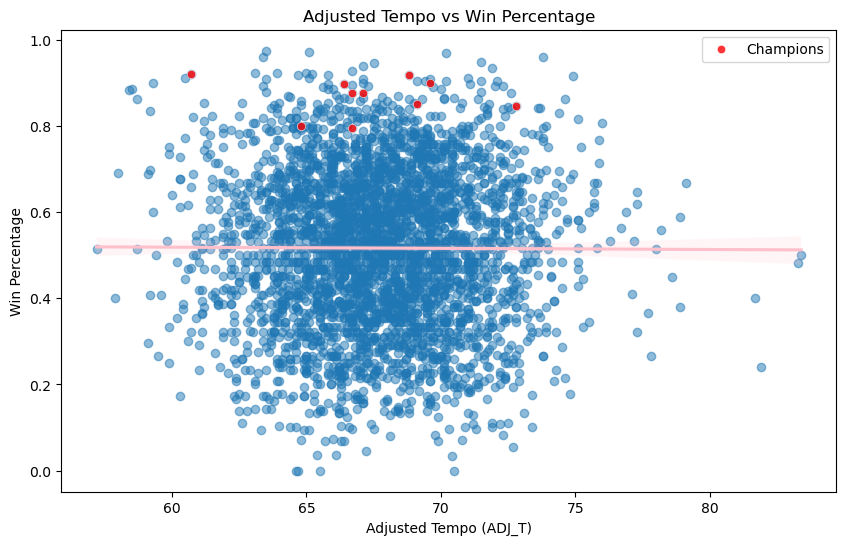

In [18]:
# Do teams that play faster, win more games?
plt.figure(figsize=(10,6))

sns.regplot(data=historical_seasons, x='ADJ_T', y='W-L%', scatter_kws={"alpha": 0.5}, line_kws={"color": "pink"})
sns.scatterplot(data=champions, x='ADJ_T', y='W-L%', color="red", alpha=0.8, label="Champions")

plt.xlabel('Adjusted Tempo (ADJ_T)') # number of posessions in 40 mins
plt.ylabel('Win Percentage')
plt.title('Adjusted Tempo vs Win Percentage')
plt.show()

It seems that how fast a team plays does not have a correlation with their win percentage. Virgina 2019 (far left) had the slowest tempo while North Carolina 2017 (far right) had the fastest tempo.

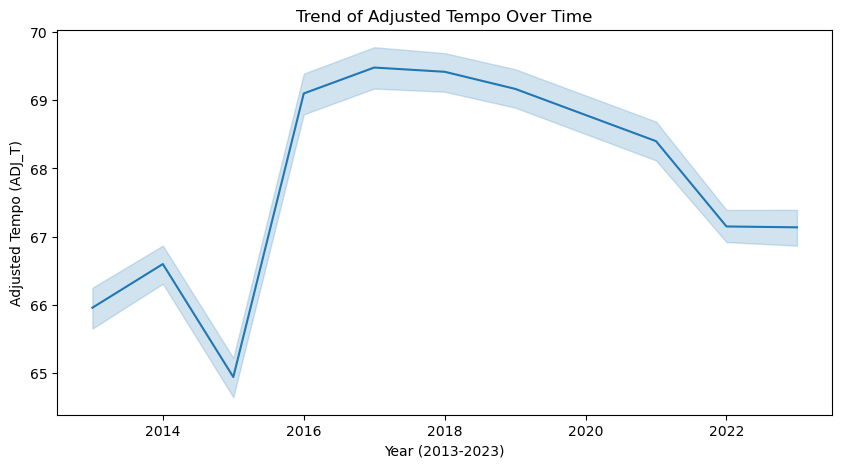

In [19]:
# Are teams playing faster over time?
plt.figure(figsize=(10,5))
sns.lineplot(data=historical_seasons, x='YEAR', y='ADJ_T')
plt.xlabel('Year (2013-2023)')
plt.ylabel('Adjusted Tempo (ADJ_T)')
plt.title('Trend of Adjusted Tempo Over Time')
plt.show()

Tempo reached the lowest drop in 2015 and steadily rose from there. Peaked in 2017 and steadily decreasing over time.

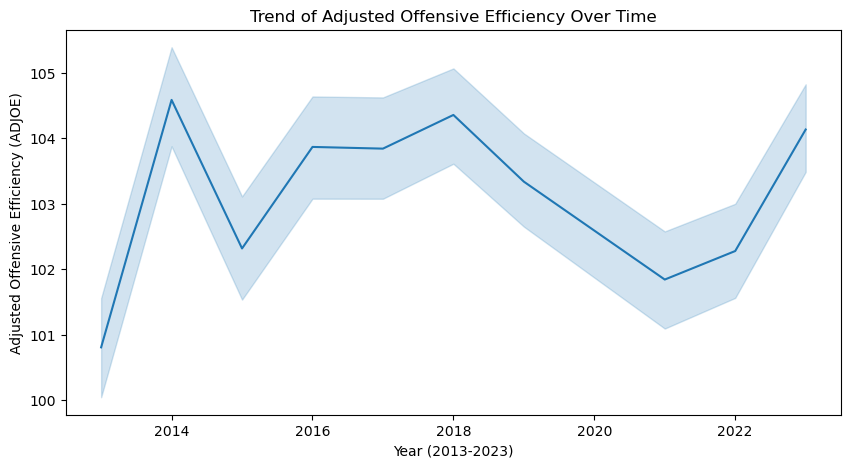

In [20]:
# Are teams getting more efficient on offense over time?
plt.figure(figsize=(10,5))
sns.lineplot(data=historical_seasons, x='YEAR', y='ADJOE')
plt.xlabel('Year (2013-2023)')
plt.ylabel('Adjusted Offensive Efficiency (ADJOE)')
plt.title('Trend of Adjusted Offensive Efficiency Over Time')
plt.show()

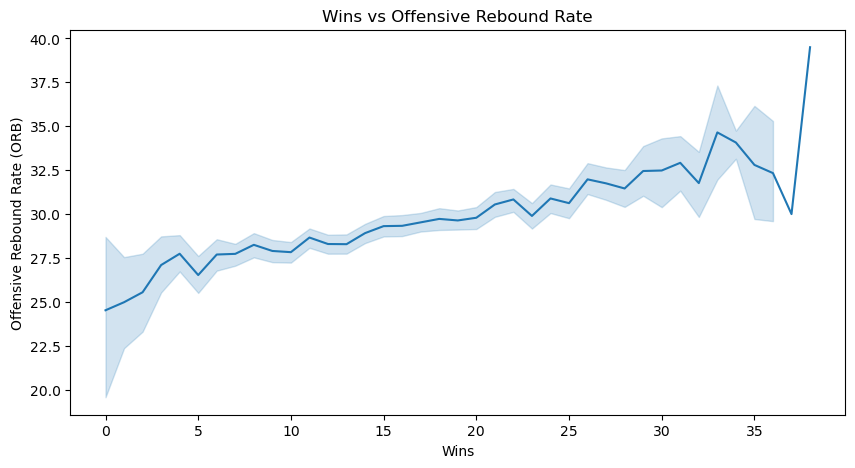

In [21]:
# Do offensive rebounding rate correlation to wins?
plt.figure(figsize=(10,5))
sns.lineplot(data=historical_seasons, x='W', y='ORB')
plt.xlabel('Wins')
plt.ylabel('Offensive Rebound Rate (ORB)')
plt.title('Wins vs Offensive Rebound Rate')
plt.show()

Let's do some EDA on the current season data.

In [22]:
merged_current_season_df.describe()

,Games,W,L,W-L%,SRS,SOS,Conf. W,Conf. L,Home W,Home L,...,3PAr,TS%,TRB%,AST%,STL%,BLK%,eFG%,TOV%,ORB%,FT/FGA
count,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,...,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000
mean,28.098901,14.758242,13.340659,0.525896,-0.201209,-0.126566,7.835165,7.835165,9.409341,4.291209,...,0.391802,0.547527,50.649725,52.478846,10.013187,9.556319,0.514797,14.980769,30.414286,0.237036
std,1.208828,4.838074,4.940349,0.172803,11.176450,6.095292,3.470501,3.477638,3.092695,2.446751,...,0.053909,0.027086,2.679866,5.282334,1.789160,2.596870,0.028839,1.729381,4.182578,0.036081
min,24.000000,3.000000,2.000000,0.103000,-34.770000,-10.510000,0.000000,0.000000,0.000000,0.000000,...,0.220000,0.461000,41.600000,39.500000,5.200000,4.300000,0.426000,11.000000,17.900000,0.156000
25%,27.000000,11.000000,10.000000,0.412250,-8.262500,-4.300000,5.000000,5.000000,7.000000,2.000000,...,0.354750,0.529750,48.975000,48.875000,8.875000,7.700000,0.496000,13.800000,27.700000,0.212000
50%,28.000000,15.000000,13.000000,0.536000,-2.400000,-2.035000,8.000000,8.000000,10.000000,4.000000,...,0.386000,0.548000,50.700000,52.300000,9.900000,9.300000,0.515500,14.900000,30.500000,0.234000
75%,29.000000,18.000000,17.000000,0.655000,7.195000,4.755000,11.000000,10.000000,12.000000,6.000000,...,0.429250,0.564250,52.425000,56.300000,11.125000,11.200000,0.532250,16.000000,33.125000,0.258000
max,31.000000,25.000000,26.000000,0.926000,30.560000,14.860000,17.000000,17.000000,18.000000,13.000000,...,0.540000,0.620000,57.500000,67.300000,15.200000,19.000000,0.588000,22.800000,41.800000,0.342000


In [23]:
# Top 10 teams this season by Simple Rating System (SRS)
top_10 = merged_current_season_df.sort_values(by='SRS', ascending=False)[:10]
top_10

,School,Games,W,L,W-L%,SRS,SOS,Conf. W,Conf. L,Home W,...,3PAr,TS%,TRB%,AST%,STL%,BLK%,eFG%,TOV%,ORB%,FT/FGA
2,Duke,28,25,3,0.893,30.56,8.99,16,1,15,...,0.453,0.612,55.9,59.7,10.5,9.9,0.580,12.4,34.7,0.247
0,Auburn,27,25,2,0.926,30.31,14.13,13,1,12,...,0.407,0.584,53.8,55.4,10.3,17.1,0.554,11.2,35.7,0.240
6,Houston,28,24,4,0.857,28.84,11.73,16,1,14,...,0.343,0.559,54.2,47.1,12.3,16.6,0.531,12.3,37.3,0.201
5,Florida,28,24,4,0.857,26.29,9.79,11,4,13,...,0.433,0.570,55.4,52.4,11.4,12.4,0.543,12.6,38.0,0.225
10,Alabama,28,23,5,0.821,26.25,14.86,12,3,12,...,0.474,0.599,54.5,54.8,7.9,10.4,0.568,14.7,36.2,0.296
12,Tennessee,28,23,5,0.821,25.16,11.59,10,5,14,...,0.430,0.561,54.8,59.9,11.0,17.1,0.526,13.9,36.7,0.243
18,Gonzaga,30,22,8,0.733,23.73,6.23,13,4,13,...,0.338,0.597,54.6,61.8,10.5,8.6,0.561,11.7,33.4,0.247
90,Arizona,27,18,9,0.667,23.66,12.51,12,4,11,...,0.348,0.569,55.6,59.3,11.5,11.9,0.528,14.4,36.7,0.274
43,Texas Tech,28,21,7,0.750,23.60,9.49,12,5,14,...,0.428,0.587,53.9,58.4,10.2,7.8,0.556,13.4,35.0,0.230
36,Maryland,27,21,6,0.778,23.31,6.94,11,5,16,...,0.356,0.585,53.8,49.9,10.5,11.9,0.555,12.9,32.4,0.239


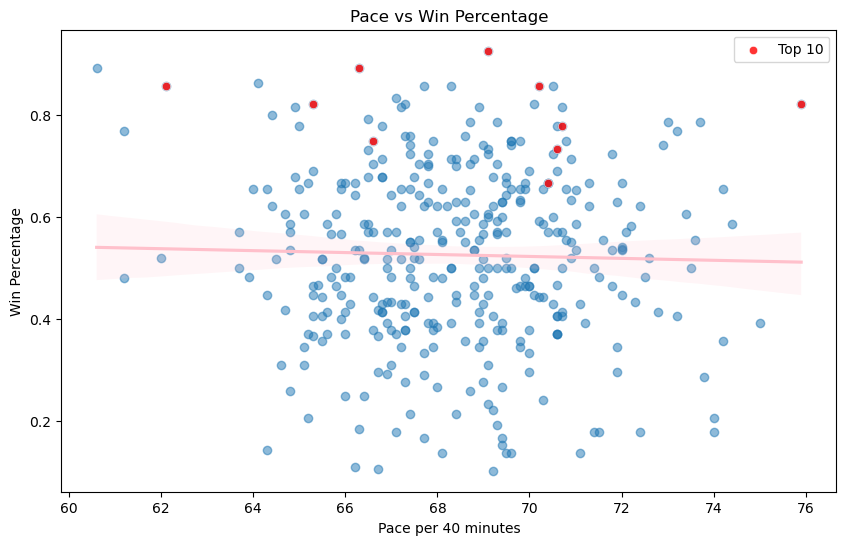

In [24]:
# Are current teams that play faster, win more games?
plt.figure(figsize=(10,6))

sns.regplot(data=merged_current_season_df, x='Pace', y='W-L%', scatter_kws={"alpha": 0.5}, line_kws={"color": "pink"})
sns.scatterplot(data=top_10, x='Pace', y='W-L%', color="red", alpha=0.8, label="Top 10")

plt.xlabel('Pace per 40 minutes') # number of posessions in 40 mins
plt.ylabel('Win Percentage')
plt.title('Pace vs Win Percentage')
plt.show()

Pace or tempo again seems to have no correlation with win percentage.

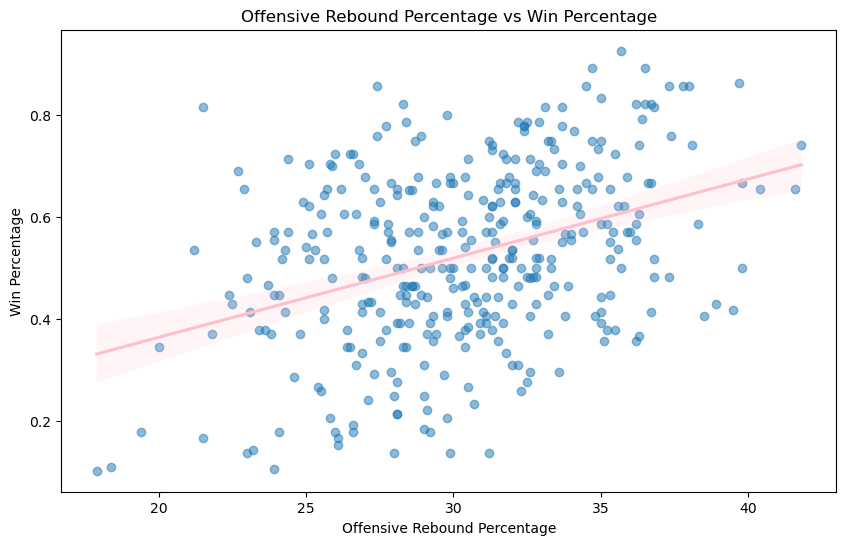

In [25]:
# Offensive Rebound Percentage vs Win Percentage
plt.figure(figsize=(10,6))
sns.regplot(data=merged_current_season_df, x='ORB%', y='W-L%', scatter_kws={"alpha": 0.5}, line_kws={"color": "pink"})
plt.xlabel('Offensive Rebound Percentage') # percentage of available offensive rebounds grabbed while on the floor
plt.ylabel('Win Percentage')
plt.title('Offensive Rebound Percentage vs Win Percentage')
plt.show()

## Model Attempt 1

In [26]:
# Divide by 100 to standardize as current season data
historical_seasons['3P_O'] = historical_seasons['3P_O'] / 100
historical_seasons['FTR'] = historical_seasons['FTR'] / 100
historical_seasons['EFG_O'] = historical_seasons['EFG_O'] / 100

In [27]:
# Take only common columns
historical_df = historical_seasons[['TEAM', 'G', 'W', 'W-L%', 'ADJOE', 'ADJ_T', '3P_O', 'FTR', 'TOR', 'TORD', 'ORB', 'EFG_O', 'POSTSEASON']]
historical_df

,TEAM,G,W,W-L%,ADJOE,ADJ_T,3P_O,FTR,TOR,TORD,ORB,EFG_O,POSTSEASON
0,North Carolina,40,33,0.825000,123.3,71.7,0.327,0.323,15.4,18.2,40.7,0.526,2ND
1,Wisconsin,40,36,0.900000,129.1,59.3,0.365,0.362,12.4,15.8,32.1,0.548,2ND
2,Michigan,40,33,0.825000,114.4,65.9,0.352,0.307,14.0,19.5,25.5,0.539,2ND
3,Texas Tech,38,31,0.815789,115.2,67.5,0.365,0.329,17.7,22.8,27.4,0.535,2ND
4,Gonzaga,39,37,0.948718,117.8,71.5,0.382,0.390,16.2,17.1,30.0,0.566,2ND
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3518,Toledo,34,27,0.794118,119.9,69.5,0.397,0.344,13.6,18.3,29.8,0.563,NaN
3519,Liberty,33,27,0.818182,111.4,64.4,0.364,0.262,16.0,18.9,25.3,0.555,NaN
3520,Utah Valley,34,28,0.823529,107.1,69.8,0.334,0.356,19.3,16.3,28.9,0.517,NaN
3521,UAB,38,29,0.763158,112.4,70.7,0.356,0.357,17.3,19.3,35.8,0.503,NaN


In [28]:
# Drop non-tournament teams
historical_df = historical_df.dropna(subset=['POSTSEASON'])
historical_df

,TEAM,G,W,W-L%,ADJOE,ADJ_T,3P_O,FTR,TOR,TORD,ORB,EFG_O,POSTSEASON
0,North Carolina,40,33,0.825000,123.3,71.7,0.327,0.323,15.4,18.2,40.7,0.526,2ND
1,Wisconsin,40,36,0.900000,129.1,59.3,0.365,0.362,12.4,15.8,32.1,0.548,2ND
2,Michigan,40,33,0.825000,114.4,65.9,0.352,0.307,14.0,19.5,25.5,0.539,2ND
3,Texas Tech,38,31,0.815789,115.2,67.5,0.365,0.329,17.7,22.8,27.4,0.535,2ND
4,Gonzaga,39,37,0.948718,117.8,71.5,0.382,0.390,16.2,17.1,30.0,0.566,2ND
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3223,Northern Kentucky,33,22,0.666667,102.6,61.9,0.343,0.269,17.3,23.3,31.6,0.491,R64
3224,Howard,32,22,0.687500,102.7,69.0,0.369,0.322,22.8,20.6,33.7,0.518,R64
3225,Texas A&M Corpus Chris,31,24,0.774194,105.8,68.9,0.364,0.348,17.7,20.4,32.8,0.505,R64
3226,Texas Southern,33,14,0.424242,95.4,69.2,0.280,0.343,20.3,18.5,29.2,0.461,R68


In [29]:
# Take top 68 teams from this season by Simple Rating System
tournament_teams_df = merged_current_season_df.sort_values(by='SRS', ascending=False).iloc[:68]
tournament_teams_df

,School,Games,W,L,W-L%,SRS,SOS,Conf. W,Conf. L,Home W,...,3PAr,TS%,TRB%,AST%,STL%,BLK%,eFG%,TOV%,ORB%,FT/FGA
2,Duke,28,25,3,0.893,30.56,8.99,16,1,15,...,0.453,0.612,55.9,59.7,10.5,9.9,0.580,12.4,34.7,0.247
0,Auburn,27,25,2,0.926,30.31,14.13,13,1,12,...,0.407,0.584,53.8,55.4,10.3,17.1,0.554,11.2,35.7,0.240
6,Houston,28,24,4,0.857,28.84,11.73,16,1,14,...,0.343,0.559,54.2,47.1,12.3,16.6,0.531,12.3,37.3,0.201
5,Florida,28,24,4,0.857,26.29,9.79,11,4,13,...,0.433,0.570,55.4,52.4,11.4,12.4,0.543,12.6,38.0,0.225
10,Alabama,28,23,5,0.821,26.25,14.86,12,3,12,...,0.474,0.599,54.5,54.8,7.9,10.4,0.568,14.7,36.2,0.296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,Kansas State,27,13,14,0.481,11.37,9.33,7,9,9,...,0.410,0.541,48.7,59.7,11.2,9.6,0.519,15.4,29.9,0.186
65,Colorado State,28,19,9,0.679,11.33,4.86,13,4,12,...,0.432,0.579,52.7,63.6,7.5,8.3,0.543,15.7,27.0,0.236
222,Butler,27,13,14,0.481,11.28,9.13,6,10,9,...,0.401,0.577,51.5,57.3,5.4,7.0,0.539,15.2,27.0,0.301
183,TCU,28,15,13,0.536,11.21,12.04,8,9,13,...,0.350,0.503,50.5,50.3,10.9,9.9,0.474,14.8,32.0,0.217


In [30]:
# UC San Diego is currently projected to be an 11 seed by ESPN Bracketology! Yay, go Tritons!
tournament_teams_df[tournament_teams_df['School'] == 'UC San Diego']

,School,Games,W,L,W-L%,SRS,SOS,Conf. W,Conf. L,Home W,...,3PAr,TS%,TRB%,AST%,STL%,BLK%,eFG%,TOV%,ORB%,FT/FGA
8,UC San Diego,28,24,4,0.857,13.1,-1.6,14,2,11,...,0.496,0.59,50.3,56.3,15.1,6.9,0.559,11.6,27.4,0.245


In [31]:
# Make columns the same names as historical dataset
current_df = tournament_teams_df[['School', 'Games', 'W', 'W-L%', 'ORtg', 'Pace', '3P%', 'FTr', 'TOV%', 'STL%', 'ORB%', 'eFG%']]
current_df.columns = ['TEAM', 'G', 'W', 'W-L%', 'ADJOE', 'ADJ_T', '3P_O', 'FTR', 'TOR', 'TORD', 'ORB', 'EFG_O']
current_df

,TEAM,G,W,W-L%,ADJOE,ADJ_T,3P_O,FTR,TOR,TORD,ORB,EFG_O
2,Duke,28,25,0.893,124.6,66.3,0.391,0.316,12.4,10.5,34.7,0.580
0,Auburn,27,25,0.926,122.0,69.1,0.362,0.324,11.2,10.3,35.7,0.554
6,Houston,28,24,0.857,118.0,62.1,0.402,0.273,12.3,12.3,37.3,0.531
5,Florida,28,24,0.857,119.1,70.2,0.351,0.316,12.6,11.4,38.0,0.543
10,Alabama,28,23,0.821,120.0,75.9,0.350,0.410,14.7,7.9,36.2,0.568
...,...,...,...,...,...,...,...,...,...,...,...,...
231,Kansas State,27,13,0.481,106.0,68.1,0.341,0.275,15.4,11.2,29.9,0.519
65,Colorado State,28,19,0.679,109.7,66.8,0.343,0.304,15.7,7.5,27.0,0.543
222,Butler,27,13,0.481,110.1,67.4,0.374,0.410,15.2,5.4,27.0,0.539
183,TCU,28,15,0.536,100.5,67.0,0.303,0.332,14.8,10.9,32.0,0.474


In [32]:
# 8 unique entries to POSTSEASON column
historical_df['POSTSEASON'].unique()

array(['2ND', 'Champions', 'E8', 'F4', 'R32', 'R64', 'R68', 'S16'],
      dtype=object)

In [33]:
!which python

/Users/kanglee/anaconda3/bin/python


Let's try to build a model using Random Forest Classifier.

In [34]:
from imblearn.over_sampling import SMOTE
# Define feature columns
feature_columns = ['G', 'W', 'W-L%', 'ADJOE', 'ADJ_T', '3P_O', 'FTR', 'TOR', 'TORD', 'ORB', 'EFG_O']

# Encode posteason as numerical values
postseason_mapping = {
    'Champions': 7, '2ND': 6, 'F4': 5, 'E8': 4,
    'S16': 3, 'R32': 2, 'R64': 1, 'R68': 0
}

# Assign numeric values
current_df = current_df.copy()
historical_df = historical_df.copy()  # Ensure it's independent
historical_df["POSTSEASON"] = historical_df["POSTSEASON"].map(postseason_mapping)

X = historical_df[feature_columns]  # Features
y = historical_df['POSTSEASON']  # Target variable

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to balance the training set
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train Random Forest Model
rf_model = RandomForestClassifier(n_estimators=500, max_depth=15,class_weight='balanced', random_state=42)
rf_model.fit(X_train_smote, y_train_smote)

# Evaluate Model
y_pred = rf_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Predicted Champion
X_2025 = current_df[feature_columns]
predictions = rf_model.predict(X_2025)
current_df["Predicted Postseason Success"] = predictions
predicted_winner = current_df.sort_values(by="Predicted Postseason Success", ascending=False).iloc[0]

print("\n🏆 Predicted 2025 March Madness Champion 🏆: ")
print(predicted_winner[["TEAM", "Predicted Postseason Success"]])

Accuracy: 0.4117647058823529
              precision    recall  f1-score   support

           0       0.20      0.25      0.22         8
           1       0.61      0.56      0.59        64
           2       0.34      0.41      0.37        32
           3       0.07      0.06      0.06        16
           4       0.38      0.38      0.38         8
           5       0.00      0.00      0.00         4
           6       0.25      0.50      0.33         2
           7       0.00      0.00      0.00         2

    accuracy                           0.41       136
   macro avg       0.23      0.27      0.24       136
weighted avg       0.41      0.41      0.41       136


🏆 Predicted 2025 March Madness Champion 🏆: 
TEAM                            Duke
Predicted Postseason Success       7
Name: 2, dtype: object


/Users/kanglee/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kanglee/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kanglee/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Pivot to New Dataset

In [35]:
# March Madness Dataset from 2002 to 2025, Insights and Projections using Historical KenPom Data
# From Kaggle: https://www.kaggle.com/datasets/jonathanpilafas/2024-march-madness-statistical-analysis
all_seasons_df = pd.read_csv('DEV _ March Madness.csv')
all_seasons_df.head()

/var/folders/1k/2p71sg_x20q3mg91vw9xjqbw0000gn/T/ipykernel_10700/925911677.py:3: DtypeWarning: Columns (144) have mixed types. Specify dtype option on import or set low_memory=False.
  all_seasons_df = pd.read_csv('DEV _ March Madness.csv')


,Season,Short Conference Name,Adjusted Temo,Adjusted Tempo Rank,Raw Tempo,Raw Tempo Rank,Adjusted Offensive Efficiency,Adjusted Offensive Efficiency Rank,Raw Offensive Efficiency,Raw Offensive Efficiency Rank,...,Current Coach,Full Team Name,Since,Active Coaching Length,Active Coaching Length Index,Seed,Region,Correct Team Name?,Post-Season Tournament,Post-Season Tournament Sorting Index
0,2025,ACC,66.0,264,66.3,282,128.6,2,124.7,1,...,Jon Scheyer,Duke Blue Devils,202223.0,2 years,3.0,Not In a Post-Season Tournament,Not In a Post-Season Tournament,NaN,Not In a Post-Season Tournament,5
1,2025,SEC,68.5,125,69.2,123,130.7,1,122.8,2,...,Bruce Pearl,Auburn Tigers,201415.0,10 years,11.0,Not In a Post-Season Tournament,Not In a Post-Season Tournament,NaN,Not In a Post-Season Tournament,5
2,2015,SEC,62.4,274,63.8,242,121.3,6,115.5,9,...,Mark Pope,Kentucky Wildcats,202425.0,0 years,1.0,Not In a Post-Season Tournament,Not In a Post-Season Tournament,NaN,Not In a Post-Season Tournament,5
3,2021,WCC,73.8,7,74.3,14,126.4,1,121.9,1,...,Mark Few,Gonzaga Bulldogs,199900.0,25 years,26.0,Not In a Post-Season Tournament,Not In a Post-Season Tournament,NaN,Not In a Post-Season Tournament,5
4,2024,BE,64.6,330,66.0,305,127.5,1,123.0,1,...,Dan Hurley,UConn Huskies,201819.0,6 years,7.0,1,East,UConn,March Madness,1


In [36]:
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', 1000)  # Increase column width

# Find missing values in columns
print(all_seasons_df.isnull().sum())

Season                                     0
Short Conference Name                      0
Adjusted Temo                              0
Adjusted Tempo Rank                        0
Raw Tempo                                  0
Raw Tempo Rank                             0
Adjusted Offensive Efficiency              0
Adjusted Offensive Efficiency Rank         0
Raw Offensive Efficiency                   0
Raw Offensive Efficiency Rank              0
Adjusted Defensive Efficiency              0
Adjusted Defensive Efficiency Rank         0
Raw Defensive Efficiency                   0
Raw Defensive Efficiency Rank              0
Avg Possession Length (Offense)         2665
Avg Possession Length (Offense) Rank    2665
Avg Possession Length (Defense)         2665
Avg Possession Length (Defense) Rank    2665
eFGPct                                     0
RankeFGPct                                 0
TOPct                                      0
RankTOPct                                  0
ORPct     

In [37]:
pd.reset_option("display.max_rows")
pd.reset_option("display.max_columns")
pd.reset_option("display.width")
pd.reset_option("display.max_colwidth")

In [38]:
# Drop uncessary columns with missing values
all_seasons_df = all_seasons_df.drop(columns=[
    'Avg Possession Length (Offense)', 'Avg Possession Length (Offense) Rank',
    'Avg Possession Length (Defense)', 'Avg Possession Length (Defense) Rank',
    'DFP', 'NSTRate', 'RankNSTRate', 'OppNSTRate', 'RankOppNSTRate', 'AvgHeight', 
    'RankAvgHeight', 'CenterHeight', 'RankCenterHeight', 'PFHeight', 'RankPFHeight', 
    'SFHeight', 'RankSFHeight', 'SGHeight', 'RankSGHeight', 'PGHeight', 'RankPGHeight', 
    'EffectiveHeight', 'RankEffectiveHeight', 'Experience', 'RankExperience', 'Bench', 
    'BenchRank', 'CenterPts', 'RankCenterPts', 'PFPts', 'RankPFPts', 'SFPts', 'RankSFPts', 
    'SGPts', 'RankSGPts', 'PGPts', 'RankPGPts', 'CenterOR', 'RankCenterOR', 'PFOR', 
    'RankPFOR', 'SFOR', 'RankSFOR', 'SGOR', 'RankSGOR', 'PGOR', 'RankPGOR', 'CenterDR', 
    'RankCenterDR', 'PFDR', 'RankPFDR', 'SFDR', 'RankSFDR', 'SGDR', 'RankSGDR', 'PGDR', 
    'RankPGDR', 'Current Coach', 'Since', 'Active Coaching Length', 'Active Coaching Length Index', 
    'Correct Team Name?'
])

print(all_seasons_df.isnull().sum())


Season                                   0
Short Conference Name                    0
Adjusted Temo                            0
Adjusted Tempo Rank                      0
Raw Tempo                                0
                                        ..
Full Team Name                          83
Seed                                     0
Region                                   0
Post-Season Tournament                   0
Post-Season Tournament Sorting Index     0
Length: 85, dtype: int64


In [39]:
# 'Full Team Name' the only column with missing values left
print(all_seasons_df.isnull().sum())

Season                                   0
Short Conference Name                    0
Adjusted Temo                            0
Adjusted Tempo Rank                      0
Raw Tempo                                0
                                        ..
Full Team Name                          83
Seed                                     0
Region                                   0
Post-Season Tournament                   0
Post-Season Tournament Sorting Index     0
Length: 85, dtype: int64


In [40]:
# Which teams are missing names?
no_name = all_seasons_df[all_seasons_df['Full Team Name'].isnull()]
no_name['Mapped ESPN Team Name'].unique()

array(['St. Francis (NY)', 'Birmingham-Southern', 'Centenary (NJ)',
       'Savannah State', 'Hartford', 'Winstom-Salem', 'Morris Brown'],
      dtype=object)

Missing teams are all low major teams that have little to no impact on the overall March Madness tournament. Therefore, we will remove these teams.

In [41]:
all_seasons_df = all_seasons_df.dropna()
all_seasons_df.shape

(8231, 85)

In [42]:
all_seasons_df = all_seasons_df.drop(columns=[
    'Short Conference Name', 'Adjusted Tempo Rank', 'Raw Tempo Rank', 'Adjusted Offensive Efficiency Rank', 'Raw Offensive Efficiency Rank',
    'Adjusted Defensive Efficiency Rank', 'Raw Defensive Efficiency Rank', 'RankeFGPct', 'RankTOPct', 'RankORPct', 'RankFTRate',
    'RankOffFT', 'RankOff2PtFG', 'RankOff3PtFG', 'RankDefFT', 'RankDef2PtFG', 'RankDef3PtFG', 'RankTempo', 'RankAdjTempo', 'RankOE',
    'RankAdjOE', 'RankDE', 'RankAdjDE', 'RankAdjEM', 'RankFG2Pct', 'RankFG3Pct', 'RankFTPct', 'RankBlockPct', 'RankOppFG2Pct', 'RankOppFG3Pct',
    'RankOppFTPct', 'RankOppBlockPct', 'RankFG3Rate', 'RankOppFG3Rate', 'RankARate', 'RankOppARate', 'RankStlRate', 'RankOppStlRate',
    'Net Rating Rank', 'Mapped Conference Name', 'Mapped ESPN Team Name', 'Region', 'Post-Season Tournament', 'Post-Season Tournament Sorting Index'])

In [43]:
all_seasons_df.head()

,Season,Adjusted Temo,Raw Tempo,Adjusted Offensive Efficiency,Raw Offensive Efficiency,Adjusted Defensive Efficiency,Raw Defensive Efficiency,eFGPct,TOPct,ORPct,...,OppBlockPct,FG3Rate,OppFG3Rate,ARate,OppARate,StlRate,OppStlRate,Net Rating,Full Team Name,Seed
0,2025,66.0,66.3,128.6,124.7,89.9,92.2,58.034084,14.392464,34.733258,...,10.133630,45.343883,38.068536,59.653465,53.409091,0.105114,0.084630,38.7,Duke Blue Devils,Not In a Post-Season Tournament
1,2025,68.5,69.2,130.7,122.8,93.7,99.0,55.841924,13.109339,35.766423,...,7.803468,40.549828,34.280420,55.502959,38.803681,0.101675,0.087224,37.0,Auburn Tigers,Not In a Post-Season Tournament
2,2015,62.4,63.8,121.3,115.5,84.4,84.7,51.511600,16.252900,39.501200,...,5.994900,27.069800,30.529300,54.970200,40.133300,0.100800,0.072500,36.9,Kentucky Wildcats,Not In a Post-Season Tournament
3,2021,73.8,74.3,126.4,121.9,89.9,93.4,61.017812,16.127934,30.070636,...,6.778370,33.180662,33.723296,55.607044,45.476478,0.106402,0.081687,36.5,Gonzaga Bulldogs,Not In a Post-Season Tournament
4,2024,64.6,66.0,127.5,123.0,91.1,96.4,56.907478,14.499681,36.697966,...,8.333333,40.177440,32.879719,63.551402,44.742729,0.093131,0.081016,36.4,UConn Huskies,1


In [44]:
winners_df = all_seasons_df[(all_seasons_df['Season'] == 2002) & (all_seasons_df['Full Team Name'] == 'Maryland Terrapins')]
winners_df 

,Season,Adjusted Temo,Raw Tempo,Adjusted Offensive Efficiency,Raw Offensive Efficiency,Adjusted Defensive Efficiency,Raw Defensive Efficiency,eFGPct,TOPct,ORPct,...,OppBlockPct,FG3Rate,OppFG3Rate,ARate,OppARate,StlRate,OppStlRate,Net Rating,Full Team Name,Seed
55,2002,73.7,75.0,119.2,113.2,89.9,94.3,53.0027,18.3287,36.0518,...,7.6739,25.8007,31.1198,65.928,53.1522,0.1118,0.0941,29.3,Maryland Terrapins,Not In a Post-Season Tournament
